# Environment setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/tmp/captcha-hacker.zip .
!cp /content/drive/MyDrive/tmp/model-54000.pth .

In [ ]:
!unzip -q -o captcha-hacker.zip -d captcha-hacker

In [ ]:
!ls -al

total 232188
drwxr-xr-x 1 root root      4096 Dec 10 12:08 .
drwxr-xr-x 1 root root      4096 Dec 10 12:06 ..
drwxr-xr-x 4 root root      4096 Dec 10 12:09 captcha-hacker
-rw------- 1 root root  66230128 Dec 10 12:08 captcha-hacker.zip
drwxr-xr-x 4 root root      4096 Dec  8 14:35 .config
drwx------ 5 root root      4096 Dec 10 12:08 drive
-rw------- 1 root root 171497420 Dec 10 12:08 model-54000.pth
drwxr-xr-x 1 root root      4096 Dec  8 14:36 sample_data


In [ ]:
TRAIN_PATH = "captcha-hacker/train"
TEST_PATH = "captcha-hacker/test"

# Model

In [ ]:
import glob
import os

import torch
import torch.jit
import torch.nn as nn
from torchsummary import summary

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
class Model_task1(torch.nn.Module):
    def __init__(self):
        super(Model_task1, self).__init__()

        self._hidden1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=48,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=48),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden2 = nn.Sequential(
            nn.Conv2d(in_channels=48, out_channels=64,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=160,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=160),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden5 = nn.Sequential(
            nn.Conv2d(in_channels=160, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden6 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden7 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden8 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden9 = nn.Sequential(
            nn.Linear(192 * 7 * 7, 3072),
            nn.ReLU()
        )
        self._hidden10 = nn.Sequential(
            nn.Linear(3072, 3072),
            nn.ReLU()
        )

        self.digit1 = nn.Sequential(nn.Linear(3072, 10))
        self.digit2 = nn.Sequential(nn.Linear(3072, 10))
        self.digit3 = nn.Sequential(nn.Linear(3072, 10))
        self.digit4 = nn.Sequential(nn.Linear(3072, 10))

    def forward(self, x):
        x = self._hidden1(x)
        x = self._hidden2(x)
        x = self._hidden3(x)
        x = self._hidden4(x)
        x = self._hidden5(x)
        x = self._hidden6(x)
        x = self._hidden7(x)
        x = self._hidden8(x)
        x = x.view(x.size(0), 192 * 7 * 7)
        x = self._hidden9(x)
        x = self._hidden10(x)

        digit1_logits = self.digit1(x)
        digit2_logits = self.digit2(x)
        digit3_logits = self.digit3(x)
        digit4_logits = self.digit4(x)

        return digit1_logits, digit2_logits, digit3_logits, digit4_logits

In [ ]:
class Model_main_task(torch.nn.Module):
    def __init__(self):
        super(Model_main_task, self).__init__()

        self._hidden1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=48,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=48),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden2 = nn.Sequential(
            nn.Conv2d(in_channels=48, out_channels=64,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=160,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=160),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden5 = nn.Sequential(
            nn.Conv2d(in_channels=160, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden6 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden7 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden8 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192,
                      kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self._hidden9 = nn.Sequential(
            nn.Linear(192 * 7 * 7, 3072),
            nn.ReLU()
        )
        self._hidden10 = nn.Sequential(
            nn.Linear(3072, 3072),
            nn.ReLU()
        )

        self.a_digit1 = nn.Sequential(nn.Linear(3072, 36))
        self.a_digit2 = nn.Sequential(nn.Linear(3072, 36))
        self.a_digit3 = nn.Sequential(nn.Linear(3072, 36))
        self.a_digit4 = nn.Sequential(nn.Linear(3072, 36))

    def forward(self, x):
        x = self._hidden1(x)
        x = self._hidden2(x)
        x = self._hidden3(x)
        x = self._hidden4(x)
        x = self._hidden5(x)
        x = self._hidden6(x)
        x = self._hidden7(x)
        x = self._hidden8(x)
        x = x.view(x.size(0), 192 * 7 * 7)
        x = self._hidden9(x)
        x = self._hidden10(x)

        digit1_logits = self.a_digit1(x)
        digit2_logits = self.a_digit2(x)
        digit3_logits = self.a_digit3(x)
        digit4_logits = self.a_digit4(x)

        return digit1_logits, digit2_logits, digit3_logits, digit4_logits

# Dataset

In [ ]:
import cv2
from PIL import Image
import numpy as np
import random
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import csv
from matplotlib import pyplot as plt

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, metadata, transform=None):
        self.X = X
        self.metadata = metadata
        self._transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, index):
        image = self.X[index]
        filename, label = self.metadata[index]

        image = Image.fromarray(image)

        if self._transform:
            image = self._transform(image)

        # length = len(label)
        digits = list()
        for ch in label:
            if ch.isdigit():  # 0~9
                t = int(ch)
            else:   # 10~35
                t = 10 + ord(ch) - ord('a')
            digits.append(t)

        # digits += [0] * (4 - len(digits))

        return image, digits
        # return image, length-1, digits
        # len=4 => 3s

In [ ]:
transform = transforms.Compose([
    # transforms.RandomCrop([54, 54]),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [ ]:
# task = "task1"
task = "task2"
# task = "task3"

train_metadata = []
val_metadata = []


with open(f'{TRAIN_PATH}/annotations.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip header

    tmp = list()
    for row in reader:
        filename, label = row
        if filename.startswith(task):
            tmp.append(row)

    for row in tmp:
        if random.random() < 0.9:
            train_metadata.append(row)
        else:
            val_metadata.append(row)

In [ ]:
train_data = []
val_data = []

for filename, label in train_metadata:
    image = cv2.imread(os.path.join('.', TRAIN_PATH, filename))
    image = cv2.resize(image, [64, 64])
    train_data.append(image)

for filename, label in val_metadata:
    image = cv2.imread(os.path.join('.', TRAIN_PATH, filename))
    image = cv2.resize(image, [64, 64])
    val_data.append(image)

In [ ]:
batch_size = 500

train_dataset = CustomDataset(train_data, train_metadata, transform=transform)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, drop_last=False, shuffle=True)

val_dataset = CustomDataset(val_data, val_metadata, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size,
                        drop_last=False, shuffle=False)

In [ ]:
print(len(train_data))
print(len(val_data))
print(len(train_dataset))
print(len(val_dataset))

2248
252
2248
252


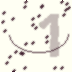

In [ ]:
img = cv2.imread(os.path.join(
    '.', TRAIN_PATH, "task1", "0Ax5C6nZ4z20Skuk.png"))
Image.fromarray(img)

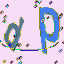

In [ ]:
transforms.ToPILImage()(train_dataset[0][0]).convert('RGB')

In [ ]:
print(train_metadata[12])
print(train_dataset[0])

['task2/R6ycgqb9i0fSUc0t.png', 'ch']
(tensor([[[0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.9686, 0.9686, 0.8588,  ..., 0.9686, 0.9686, 0.9686],
         [0.9686, 0.9686, 0.9373,  ..., 0.9686, 0.9686, 0.9686],
         [0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686]],

        [[0.8667, 0.8667, 0.8667,  ..., 0.8667, 0.8667, 0.8667],
         [0.8667, 0.8667, 0.8667,  ..., 0.8667, 0.8667, 0.8667],
         [0.8667, 0.8667, 0.8667,  ..., 0.8667, 0.8667, 0.8667],
         ...,
         [0.8667, 0.8667, 0.7961,  ..., 0.8667, 0.8667, 0.8667],
         [0.8667, 0.8667, 0.8510,  ..., 0.8667, 0.8667, 0.8667],
         [0.8667, 0.8667, 0.8667,  ..., 0.8667, 0.8667, 0.8667]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.

# Train

In [ ]:
import numpy as np
import torch
import torch.nn.functional
import torch.optim as optim
import torch.utils.data
from torch.optim.lr_scheduler import StepLR
from torchvision import transforms

import os
import time
import copy
from datetime import datetime

In [ ]:
def evaluate_task1(model, dataloader):
    num_correct = 0

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)

            num_correct += (
                digit1_pred.eq(digits_labels[0])
            ).cpu().sum()

    accuracy = num_correct.item() / len(dataloader.dataset)
    return accuracy


def evaluate_task2(model, dataloader):
    num_correct = 0

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)
            _, digit2_pred = torch.max(digit2_logits, 1)

            num_correct += (
                digit1_pred.eq(digits_labels[0]) &
                digit2_pred.eq(digits_labels[1])
            ).cpu().sum()

    accuracy = num_correct.item() / len(dataloader.dataset)
    return accuracy


def evaluate_task3(model, dataloader):
    num_correct = 0

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)
            _, digit2_pred = torch.max(digit2_logits, 1)
            _, digit3_pred = torch.max(digit3_logits, 1)
            _, digit4_pred = torch.max(digit4_logits, 1)

            num_correct += (
                digit1_pred.eq(digits_labels[0]) &
                digit2_pred.eq(digits_labels[1]) &
                digit3_pred.eq(digits_labels[2]) &
                digit4_pred.eq(digits_labels[3])
            ).cpu().sum()

    accuracy = num_correct.item() / len(dataloader.dataset)
    return accuracy

In [ ]:
def _loss_task1(digit1_logits, digit2_logits, digit3_logits, digit4_logits, digits_labels):
    digit1_loss = torch.nn.functional.cross_entropy(
        digit1_logits, digits_labels[0])
    loss = digit1_loss
    return loss


def _loss_task2(digit1_logits, digit2_logits, digit3_logits, digit4_logits, digits_labels):
    digit1_loss = torch.nn.functional.cross_entropy(
        digit1_logits, digits_labels[0])
    digit2_loss = torch.nn.functional.cross_entropy(
        digit2_logits, digits_labels[1])
    loss = digit1_loss + digit2_loss
    return loss


def _loss_task3(digit1_logits, digit2_logits, digit3_logits, digit4_logits, digits_labels):
    digit1_loss = torch.nn.functional.cross_entropy(
        digit1_logits, digits_labels[0])
    digit2_loss = torch.nn.functional.cross_entropy(
        digit2_logits, digits_labels[1])
    digit3_loss = torch.nn.functional.cross_entropy(
        digit3_logits, digits_labels[2])
    digit4_loss = torch.nn.functional.cross_entropy(
        digit4_logits, digits_labels[3])
    loss = digit1_loss + digit2_loss + digit3_loss + digit4_loss
    return loss

In [ ]:
def _train(model, PATH_LOG,
           path_to_restore_checkpoint_file,
           training_options, task):
    if task == "task1":
        _loss = _loss_task1
        evaluate = evaluate_task1
    elif task == "task2":
        _loss = _loss_task2
        evaluate = evaluate_task2
    elif task == "task3":
        _loss = _loss_task3
        evaluate = evaluate_task3
    else:
        raise Exception("wrong task")

    batch_size = training_options['batch_size']
    lr = training_options['learning_rate']
    Epochs = training_options['epochs']
    step_size = training_options['decay_steps']
    gamma = training_options['decay_rate']
    weight_decay = training_options['weight_decay']

    step = 0
    best_accuracy = 0.0
    duration = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())

    optimizer = optim.Adam(model.parameters(),
                           lr=lr,
                           betas=(0.9, 0.999),
                           eps=1e-08,
                           weight_decay=weight_decay,
                           amsgrad=False)
    # optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # if path_to_restore_checkpoint_file is not None:
    #     assert os.path.isfile(path_to_restore_checkpoint_file), '%s not found' % path_to_restore_checkpoint_file
    #     step = model.restore(path_to_restore_checkpoint_file)
    #     scheduler.last_epoch = step
    #     print('Model restored from file: %s' % path_to_restore_checkpoint_file)

    # path_to_losses_npy_file = os.path.join(PATH_LOG, 'losses.npy')
    # if os.path.isfile(path_to_losses_npy_file):
    #     losses = np.load(path_to_losses_npy_file)
    # else:
    #     losses = np.empty([0], dtype=np.float32)

    for epoch in range(Epochs):
        print(f'Epoch {epoch}/{Epochs - 1}')
        print('-' * 10)

        for batch_idx, (images, digits_labels) in enumerate(train_loader):
            start_time = time.time()

            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]

            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.train()(images)

            loss = _loss(digit1_logits, digit2_logits,
                         digit3_logits, digit4_logits, digits_labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            step += 1
            duration += time.time() - start_time

        scheduler.step()
        print('=> Loss = %f, lr = %f' % (loss.item(), scheduler.get_lr()[0]))

        # losses = np.append(losses, loss.item())
        # np.save(path_to_losses_npy_file, losses)

        train_acc = evaluate(model, train_loader)
        print(f'train acc: {train_acc}')
        print('=> Evaluating on validation dataset...')
        accuracy = evaluate(model, val_loader)

        if accuracy > best_accuracy:
            # path_to_checkpoint_file = model.store(PATH_LOG, step=step)
            # print('=> Model saved to file: %s' % path_to_checkpoint_file)
            best_accuracy = accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

        print('==> accuracy = %f, best accuracy %f' %
              (accuracy, best_accuracy))

    model.load_state_dict(best_model_wts)
    return

# train script

## task1

In [ ]:
PATH = "model-54000.pth"
model = Model_task1()
model.load_state_dict(torch.load(PATH), strict=False)
model = model.to(device)

In [ ]:
for param in model.parameters():
    param.requires_grad = False
for param in model.digit1.parameters():
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task1.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 10,
    'decay_steps': 5,
    'decay_rate': 0.9,
    'weight_decay': 1e-5
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task1")

Epoch 0/9
----------
=> Loss = 2.015769, lr = 0.001000
train acc: 0.6142697881828316
=> Evaluating on validation dataset...
==> accuracy = 0.572816, best accuracy 0.572816
Epoch 1/9
----------
=> Loss = 1.576464, lr = 0.001000
train acc: 0.7129319955406912
=> Evaluating on validation dataset...
==> accuracy = 0.728155, best accuracy 0.728155
Epoch 2/9
----------
=> Loss = 1.451464, lr = 0.001000
train acc: 0.761984392419175
=> Evaluating on validation dataset...
==> accuracy = 0.771845, best accuracy 0.771845
Epoch 3/9
----------
=> Loss = 1.163303, lr = 0.001000
train acc: 0.7692307692307693
=> Evaluating on validation dataset...
==> accuracy = 0.766990, best accuracy 0.771845
Epoch 4/9
----------
=> Loss = 1.084081, lr = 0.000810
train acc: 0.7658862876254181
=> Evaluating on validation dataset...
==> accuracy = 0.766990, best accuracy 0.771845
Epoch 5/9
----------
=> Loss = 1.076433, lr = 0.000900
train acc: 0.7653288740245262
=> Evaluating on validation dataset...
==> accuracy = 0.

### freeze layers

In [ ]:
for param in model._hidden9.parameters():
    param.requires_grad = True
for param in model._hidden10.parameters():
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task1.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 20,
    'decay_steps': 5,
    'decay_rate': 0.9,
    'weight_decay': 1e-5
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task1")

Epoch 0/19
----------
=> Loss = 1.413214, lr = 0.001000
train acc: 0.6287625418060201
=> Evaluating on validation dataset...
==> accuracy = 0.640777, best accuracy 0.640777
Epoch 1/19
----------
=> Loss = 1.417737, lr = 0.001000
train acc: 0.7647714604236343
=> Evaluating on validation dataset...
==> accuracy = 0.757282, best accuracy 0.757282
Epoch 2/19
----------
=> Loss = 1.154544, lr = 0.001000
train acc: 0.7413600891861761
=> Evaluating on validation dataset...
==> accuracy = 0.723301, best accuracy 0.757282
Epoch 3/19
----------
=> Loss = 0.848794, lr = 0.001000
train acc: 0.7775919732441472
=> Evaluating on validation dataset...
==> accuracy = 0.786408, best accuracy 0.786408
Epoch 4/19
----------
=> Loss = 0.796359, lr = 0.000810
train acc: 0.7909698996655519
=> Evaluating on validation dataset...
==> accuracy = 0.786408, best accuracy 0.786408
Epoch 5/19
----------
=> Loss = 0.780133, lr = 0.000900
train acc: 0.7853957636566332
=> Evaluating on validation dataset...
==> accura

In [ ]:
for param in model.parameters():
    param.requires_grad = True

In [ ]:
# tmp model weight
tmp_model_weight = copy.deepcopy(model.state_dict())

In [ ]:
model.load_state_dict(tmp_model_weight)

<All keys matched successfully>

In [ ]:
PATH_LOG = 'logs/task1.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.0001,
    'epochs': 100,
    'decay_steps': 5,
    'decay_rate': 0.9,
    'weight_decay': 1e-5
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task1")

Epoch 0/99
----------
=> Loss = 0.383306, lr = 0.000100
train acc: 0.9325529542920847
=> Evaluating on validation dataset...
==> accuracy = 0.888350, best accuracy 0.888350
Epoch 1/99
----------
=> Loss = 0.255513, lr = 0.000100
train acc: 0.9526198439241917
=> Evaluating on validation dataset...
==> accuracy = 0.912621, best accuracy 0.912621
Epoch 2/99
----------
=> Loss = 0.125924, lr = 0.000100
train acc: 0.967670011148272
=> Evaluating on validation dataset...
==> accuracy = 0.936893, best accuracy 0.936893
Epoch 3/99
----------
=> Loss = 0.147625, lr = 0.000100
train acc: 0.9843924191750278
=> Evaluating on validation dataset...
==> accuracy = 0.951456, best accuracy 0.951456
Epoch 4/99
----------
=> Loss = 0.069306, lr = 0.000081
train acc: 0.9916387959866221
=> Evaluating on validation dataset...
==> accuracy = 0.951456, best accuracy 0.951456
Epoch 5/99
----------
=> Loss = 0.091222, lr = 0.000090
train acc: 0.9949832775919732
=> Evaluating on validation dataset...
==> accurac

In [ ]:
# for param in model.parameters():
# print(param.requires_grad)

summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 64, 64]           3,648
       BatchNorm2d-2           [-1, 48, 64, 64]              96
              ReLU-3           [-1, 48, 64, 64]               0
         MaxPool2d-4           [-1, 48, 33, 33]               0
           Dropout-5           [-1, 48, 33, 33]               0
            Conv2d-6           [-1, 64, 33, 33]          76,864
       BatchNorm2d-7           [-1, 64, 33, 33]             128
              ReLU-8           [-1, 64, 33, 33]               0
         MaxPool2d-9           [-1, 64, 34, 34]               0
          Dropout-10           [-1, 64, 34, 34]               0
           Conv2d-11          [-1, 128, 34, 34]         204,928
      BatchNorm2d-12          [-1, 128, 34, 34]             256
             ReLU-13          [-1, 128, 34, 34]               0
        MaxPool2d-14          [-1, 128,

## task2

In [ ]:
PATH = "model-54000.pth"
model_task2 = Model_main_task()
model_task2.load_state_dict(torch.load(PATH), strict=False)
model_task2 = model_task2.to(device)

In [ ]:
for param in model_task2.parameters():
    param.requires_grad = False
for param in model_task2.a_digit1.parameters():  # freeze digit1
    param.requires_grad = True
for param in model_task2.a_digit2.parameters():  # freeze digit2
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task2.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.01,
    'epochs': 10,
    'decay_steps': 10,
    'decay_rate': 0.9,
    'weight_decay': 1e-4
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task2, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task2")

Epoch 0/9
----------


/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:381: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


=> Loss = 8.818407, lr = 0.010000
train acc: 0.05338078291814947
=> Evaluating on validation dataset...
==> accuracy = 0.055556, best accuracy 0.055556
Epoch 1/9
----------
=> Loss = 7.128309, lr = 0.010000
train acc: 0.08585409252669039
=> Evaluating on validation dataset...
==> accuracy = 0.047619, best accuracy 0.055556
Epoch 2/9
----------
=> Loss = 5.549315, lr = 0.010000
train acc: 0.11298932384341637
=> Evaluating on validation dataset...
==> accuracy = 0.083333, best accuracy 0.083333
Epoch 3/9
----------
=> Loss = 5.091677, lr = 0.010000
train acc: 0.12633451957295375
=> Evaluating on validation dataset...
==> accuracy = 0.075397, best accuracy 0.083333
Epoch 4/9
----------
=> Loss = 4.752395, lr = 0.010000
train acc: 0.1436832740213523
=> Evaluating on validation dataset...
==> accuracy = 0.103175, best accuracy 0.103175
Epoch 5/9
----------
=> Loss = 4.403573, lr = 0.010000
train acc: 0.16058718861209964
=> Evaluating on validation dataset...
==> accuracy = 0.103175, best ac

### freeze layers

In [ ]:
for param in model_task2._hidden9.parameters():  # hidden9
    param.requires_grad = True
for param in model_task2._hidden10.parameters():  # hidden10
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task2.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 10,
    'decay_steps': 10,
    'decay_rate': 0.9,
    'weight_decay': 1e-4
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task2, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task2")

Epoch 0/9
----------
=> Loss = 4.670162, lr = 0.001000
train acc: 0.14991103202846975
=> Evaluating on validation dataset...
==> accuracy = 0.095238, best accuracy 0.095238
Epoch 1/9
----------
=> Loss = 4.728774, lr = 0.001000
train acc: 0.152135231316726
=> Evaluating on validation dataset...
==> accuracy = 0.095238, best accuracy 0.095238
Epoch 2/9
----------
=> Loss = 4.524100, lr = 0.001000
train acc: 0.1797153024911032
=> Evaluating on validation dataset...
==> accuracy = 0.083333, best accuracy 0.095238
Epoch 3/9
----------
=> Loss = 4.298294, lr = 0.001000
train acc: 0.19128113879003558
=> Evaluating on validation dataset...
==> accuracy = 0.115079, best accuracy 0.115079
Epoch 4/9
----------
=> Loss = 4.065063, lr = 0.001000
train acc: 0.21263345195729538
=> Evaluating on validation dataset...
==> accuracy = 0.115079, best accuracy 0.115079
Epoch 5/9
----------
=> Loss = 4.166919, lr = 0.001000
train acc: 0.2277580071174377
=> Evaluating on validation dataset...
==> accuracy =

In [ ]:
for param in model_task2.parameters():
    param.requires_grad = True

In [ ]:
# tmp model weight
tmp_model_task2_weight = copy.deepcopy(model_task2.state_dict())

In [ ]:
PATH_LOG = 'logs/task2.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 100,
    'decay_steps': 10,
    'decay_rate': 0.9,
    'weight_decay': 1e-3
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task2, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task2")

Epoch 0/99
----------
=> Loss = 3.733976, lr = 0.001000
train acc: 0.08852313167259787
=> Evaluating on validation dataset...
==> accuracy = 0.059524, best accuracy 0.059524
Epoch 1/99
----------
=> Loss = 2.141745, lr = 0.001000
train acc: 0.4417259786476868
=> Evaluating on validation dataset...
==> accuracy = 0.325397, best accuracy 0.325397
Epoch 2/99
----------
=> Loss = 1.259037, lr = 0.001000
train acc: 0.6565836298932385
=> Evaluating on validation dataset...
==> accuracy = 0.543651, best accuracy 0.543651
Epoch 3/99
----------
=> Loss = 0.679077, lr = 0.001000
train acc: 0.7838078291814946
=> Evaluating on validation dataset...
==> accuracy = 0.702381, best accuracy 0.702381
Epoch 4/99
----------
=> Loss = 0.461041, lr = 0.001000
train acc: 0.8220640569395018
=> Evaluating on validation dataset...
==> accuracy = 0.694444, best accuracy 0.702381
Epoch 5/99
----------
=> Loss = 0.295403, lr = 0.001000
train acc: 0.9203736654804271
=> Evaluating on validation dataset...
==> accur

In [ ]:
# for param in model_task2.parameters():
#     print(param.requires_grad)

summary(model_task2, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 64, 64]           3,648
       BatchNorm2d-2           [-1, 48, 64, 64]              96
              ReLU-3           [-1, 48, 64, 64]               0
         MaxPool2d-4           [-1, 48, 33, 33]               0
           Dropout-5           [-1, 48, 33, 33]               0
            Conv2d-6           [-1, 64, 33, 33]          76,864
       BatchNorm2d-7           [-1, 64, 33, 33]             128
              ReLU-8           [-1, 64, 33, 33]               0
         MaxPool2d-9           [-1, 64, 34, 34]               0
          Dropout-10           [-1, 64, 34, 34]               0
           Conv2d-11          [-1, 128, 34, 34]         204,928
      BatchNorm2d-12          [-1, 128, 34, 34]             256
             ReLU-13          [-1, 128, 34, 34]               0
        MaxPool2d-14          [-1, 128,

## task3

In [ ]:
PATH = "model-54000.pth"
model_task3 = Model_main_task()
model_task3.load_state_dict(torch.load(PATH), strict=False)
model_task3 = model_task3.to(device)

In [ ]:
for param in model_task3.parameters():
    param.requires_grad = False
for param in model_task3.a_digit1.parameters():  # freeze digit1
    param.requires_grad = True
for param in model_task3.a_digit2.parameters():  # freeze digit2
    param.requires_grad = True
for param in model_task3.a_digit2.parameters():  # freeze digit3
    param.requires_grad = True
for param in model_task3.a_digit4.parameters():  # freeze digit4
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task3.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.01,
    'epochs': 20,
    'decay_steps': 10,
    'decay_rate': 0.9,
    'weight_decay': 1e-4
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task3, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task3")

Epoch 0/19
----------


/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:381: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


=> Loss = 19.131592, lr = 0.010000
train acc: 0.0
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 1/19
----------
=> Loss = 15.971531, lr = 0.010000
train acc: 0.0
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 2/19
----------
=> Loss = 14.199983, lr = 0.010000
train acc: 0.0
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 3/19
----------
=> Loss = 13.149967, lr = 0.010000
train acc: 0.0
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 4/19
----------
=> Loss = 12.371505, lr = 0.010000
train acc: 0.000736105999263894
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 5/19
----------
=> Loss = 12.116549, lr = 0.010000
train acc: 0.000368052999631947
=> Evaluating on validation dataset...
==> accuracy = 0.003534, best accuracy 0.003534
Epoch 6/19
----------
=> Loss = 12

### freeze layers

In [ ]:
for param in model_task3._hidden9.parameters():  # hidden9
    param.requires_grad = True
for param in model_task3._hidden10.parameters():  # hidden10
    param.requires_grad = True

In [ ]:
PATH_LOG = 'logs/task3.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 20,
    'decay_steps': 10,
    'decay_rate': 0.9,
    'weight_decay': 1e-4
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task3, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task3")

Epoch 0/19
----------
=> Loss = 11.939450, lr = 0.001000
train acc: 0.001104158998895841
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 1/19
----------
=> Loss = 11.660884, lr = 0.001000
train acc: 0.002944423997055576
=> Evaluating on validation dataset...
==> accuracy = 0.003534, best accuracy 0.003534
Epoch 2/19
----------
=> Loss = 11.300001, lr = 0.001000
train acc: 0.002208317997791682
=> Evaluating on validation dataset...
==> accuracy = 0.003534, best accuracy 0.003534
Epoch 3/19
----------
=> Loss = 11.010586, lr = 0.001000
train acc: 0.002944423997055576
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.003534
Epoch 4/19
----------
=> Loss = 11.106167, lr = 0.001000
train acc: 0.006624953993375046
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.003534
Epoch 5/19
----------
=> Loss = 10.887674, lr = 0.001000
train acc: 0.008465218991534781
=> Evaluating on validation dat

In [ ]:
for param in model_task3.parameters():
    param.requires_grad = True

In [ ]:
# tmp model weight
tmp_model_task3_weight = copy.deepcopy(model_task3.state_dict())

In [ ]:
model_task3.load_state_dict(tmp_model_task3_weight)

<All keys matched successfully>

In [ ]:
PATH_LOG = 'logs/task3.pth'
path_to_restore_checkpoint_file = None
training_options = {
    'batch_size': batch_size,
    'learning_rate': 0.001,
    'epochs': 300,
    'decay_steps': 20,
    'decay_rate': 0.9,
    'weight_decay': 1e-3
}

if not os.path.exists(PATH_LOG):
    os.makedirs(PATH_LOG)

_train(model_task3, PATH_LOG, path_to_restore_checkpoint_file,
       training_options, "task3")

Epoch 0/299
----------
=> Loss = 10.884959, lr = 0.001000
train acc: 0.000368052999631947
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 1/299
----------
=> Loss = 8.647619, lr = 0.001000
train acc: 0.010305483989694516
=> Evaluating on validation dataset...
==> accuracy = 0.000000, best accuracy 0.000000
Epoch 2/299
----------
=> Loss = 6.984584, lr = 0.001000
train acc: 0.03312476996687523
=> Evaluating on validation dataset...
==> accuracy = 0.007067, best accuracy 0.007067
Epoch 3/299
----------
=> Loss = 5.646775, lr = 0.001000
train acc: 0.10268678689731321
=> Evaluating on validation dataset...
==> accuracy = 0.031802, best accuracy 0.031802
Epoch 4/299
----------
=> Loss = 4.647029, lr = 0.001000
train acc: 0.18292234081707767
=> Evaluating on validation dataset...
==> accuracy = 0.077739, best accuracy 0.077739
Epoch 5/299
----------
=> Loss = 3.739812, lr = 0.001000
train acc: 0.333456017666544
=> Evaluating on validation dataset.

In [ ]:
# for param in model_task3.parameters():
#     print(param.requires_grad)

summary(model_task3, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 64, 64]           3,648
       BatchNorm2d-2           [-1, 48, 64, 64]              96
              ReLU-3           [-1, 48, 64, 64]               0
         MaxPool2d-4           [-1, 48, 33, 33]               0
           Dropout-5           [-1, 48, 33, 33]               0
            Conv2d-6           [-1, 64, 33, 33]          76,864
       BatchNorm2d-7           [-1, 64, 33, 33]             128
              ReLU-8           [-1, 64, 33, 33]               0
         MaxPool2d-9           [-1, 64, 34, 34]               0
          Dropout-10           [-1, 64, 34, 34]               0
           Conv2d-11          [-1, 128, 34, 34]         204,928
      BatchNorm2d-12          [-1, 128, 34, 34]             256
             ReLU-13          [-1, 128, 34, 34]               0
        MaxPool2d-14          [-1, 128,

# Save model

## task1

In [ ]:
# torch.save(model.state_dict(), 'task1.pth')

In [ ]:
# !cp task1.pth /content/drive/MyDrive/tmp

## task2

In [ ]:
# torch.save(model_task2.state_dict(), 'task2.pth')

In [ ]:
# !cp task2.pth /content/drive/MyDrive/tmp

## task3

In [ ]:
# torch.save(model_task3.state_dict(), 'task3.pth')

In [ ]:
# !cp task3.pth /content/drive/MyDrive/tmp

# val test

In [ ]:
# LOAD_WEIGHT_PATH = "task1.pth"
LOAD_WEIGHT_PATH = "task2.pth"
# LOAD_WEIGHT_PATH = "task3.pth"
# test_model = Model_task1()
test_model = Model_main_task()

test_model.load_state_dict(torch.load(LOAD_WEIGHT_PATH))
test_model = test_model.to(device)

In [ ]:
# evaluate_task1(test_model, val_loader)
evaluate_task2(test_model, val_loader)
# evaluate_task3(test_model, val_loader)

0.9923954372623575

# Load Test Dataset

In [ ]:
!cp /content/drive/MyDrive/tmp/task1.pth .
!cp /content/drive/MyDrive/tmp/task2.pth .
!cp /content/drive/MyDrive/tmp/task3.pth .
!ls -al

total 736344
drwxr-xr-x 1 root root      4096 Dec  9 17:09 .
drwxr-xr-x 1 root root      4096 Dec  9 13:13 ..
drwxr-xr-x 4 root root      4096 Dec  9 14:34 captcha-hacker
-rw------- 1 root root  66230128 Dec  9 14:34 captcha-hacker.zip
drwxr-xr-x 4 root root      4096 Dec  7 14:40 .config
drwx------ 5 root root      4096 Dec  9 13:15 drive
drwxr-xr-x 4 root root      4096 Dec  9 16:46 logs
-rw------- 1 root root 171497420 Dec  9 14:34 model-54000.pth
drwxr-xr-x 1 root root      4096 Dec  7 14:41 sample_data
-rw------- 1 root root 171232525 Dec  9 17:09 task1.pth
-rw-r--r-- 1 root root 172511053 Dec  9 17:09 task2.pth
-rw------- 1 root root 172511053 Dec  9 17:09 task3.pth


In [ ]:
test_task1_metadata = []
test_task2_metadata = []
test_task3_metadata = []

PATH_sample_submission = os.path.join(
    "captcha-hacker", "sample_submission.csv")

with open(PATH_sample_submission, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip header

    for row in reader:
        filename, label = row

        if filename.startswith("task1"):
            test_task1_metadata.append(row)
        elif filename.startswith("task2"):
            test_task2_metadata.append(row)
        elif filename.startswith("task3"):
            test_task3_metadata.append(row)

In [ ]:
test_task1_data = []
test_task2_data = []
test_task3_data = []

for filename, label in test_task1_metadata:
    image = cv2.imread(os.path.join('.', TEST_PATH, filename))
    image = cv2.resize(image, [64, 64])
    test_task1_data.append(image)

for filename, label in test_task2_metadata:
    image = cv2.imread(os.path.join('.', TEST_PATH, filename))
    image = cv2.resize(image, [64, 64])
    test_task2_data.append(image)

for filename, label in test_task3_metadata:
    image = cv2.imread(os.path.join('.', TEST_PATH, filename))
    image = cv2.resize(image, [64, 64])
    test_task3_data.append(image)

In [ ]:
print(len(test_task1_metadata))
print(len(test_task2_metadata))
print(len(test_task3_metadata))
print(len(test_task1_data))
print(len(test_task2_data))
print(len(test_task3_data))

6500
2500
1000
6500
2500
1000


In [ ]:
batch_size = 500

test_task1_dataset = CustomDataset(
    test_task1_data, test_task1_metadata, transform=transform)
test_task2_dataset = CustomDataset(
    test_task2_data, test_task2_metadata, transform=transform)
test_task3_dataset = CustomDataset(
    test_task3_data, test_task3_metadata, transform=transform)

test_task1_loader = DataLoader(
    test_task1_dataset, batch_size=batch_size, drop_last=False, shuffle=False)
test_task2_loader = DataLoader(
    test_task2_dataset, batch_size=batch_size, drop_last=False, shuffle=False)
test_task3_loader = DataLoader(
    test_task3_dataset, batch_size=batch_size, drop_last=False, shuffle=False)

In [ ]:
PATH_WEIGHT_task1 = "task1.pth"
PATH_WEIGHT_task2 = "task2.pth"
PATH_WEIGHT_task3 = "task3.pth"

In [ ]:
t_model_task1 = Model_task1()
t_model_task1.load_state_dict(torch.load(PATH_WEIGHT_task1))
t_model_task1 = t_model_task1.to(device)

t_model_task2 = Model_main_task()
t_model_task2.load_state_dict(torch.load(PATH_WEIGHT_task2))
t_model_task2 = t_model_task2.to(device)

t_model_task3 = Model_main_task()
t_model_task3.load_state_dict(torch.load(PATH_WEIGHT_task3))
t_model_task3 = t_model_task3.to(device)

# Predict test data

In [ ]:
def predict_task1(model, dataloader):
    pred = []

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)

            for x in digit1_pred.tolist():
                pred.append(str(x))

    return pred


def predict_task2(model, dataloader):
    pred = []

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)
            _, digit2_pred = torch.max(digit2_logits, 1)

            for a, b in zip(digit1_pred.tolist(), digit2_pred.tolist()):
                def to_char(x): return str(
                    x) if x < 10 else chr(ord('a') + x - 10)
                a = to_char(a)
                b = to_char(b)
                pred.append(a+b)

    return pred


def predict_task3(model, dataloader):
    pred = []

    with torch.no_grad():
        for batch_idx, (images, digits_labels) in enumerate(dataloader):
            images, digits_labels = images.to(device), [digit_labels.to(
                device) for digit_labels in digits_labels]
            digit1_logits, digit2_logits, digit3_logits, digit4_logits = model.eval()(images)

            _, digit1_pred = torch.max(digit1_logits, 1)
            _, digit2_pred = torch.max(digit2_logits, 1)
            _, digit3_pred = torch.max(digit3_logits, 1)
            _, digit4_pred = torch.max(digit4_logits, 1)

            for a, b, c, d in zip(digit1_pred.tolist(), digit2_pred.tolist(), digit3_pred.tolist(), digit4_pred.tolist()):
                def to_char(x): return str(
                    x) if x < 10 else chr(ord('a') + x - 10)
                a = to_char(a)
                b = to_char(b)
                c = to_char(c)
                d = to_char(d)
                pred.append(a+b+c+d)
    return pred

In [ ]:
a_list = predict_task1(t_model_task1, test_task1_loader)
b_list = predict_task2(t_model_task2, test_task2_loader)
c_list = predict_task3(t_model_task3, test_task3_loader)

In [ ]:
# print(a_list)
# print(b_list)
# print(c_list)
print(len(a_list))
print(len(b_list))
print(len(c_list))

['m1rn', 'yn1x', '9k6w', '2ttp', '1fed', '1977', '8455', 'v15n', 'yce3', 'sw74', 'nhjp', '99m2', '1sks', '0sdt', 't3kw', '3njr', '45h7', 'f02p', 'jccv', 'kskc', 'wxdh', 'xsk0', '9n65', '9aff', '1jvs', 'yesk', 'nnnf', '53sj', 'wh1h', 'ec3x', '4nn1', 'rfpk', 'jvxd', 'aw3r', '1shr', 'n312', 'are4', 'p58n', 'vjxw', 'ysyj', 'j3ak', 'ccs6', '4r67', 'phpv', 'r0p8', 't4h6', 'xf6j', 'afpc', 'de5r', 'h2d2', 'v704', 'ha7r', 'xvfs', 'te5w', 'cxm0', 'yx7r', 'y67h', 'f7wv', 'v8wt', '5xfj', '3ra6', 'djkk', '9xj7', 'k80r', 'xyj5', 'fr18', 'c50p', 'v61k', 'vr0j', 'kjt7', 'f479', '756c', 'dvm8', 'd7cy', '9vd0', '9d30', 'h2jn', 'dp2k', '23jc', '41ry', 'x6y2', '5nax', 'xnv6', 'mwes', '9hmm', '3j7d', '6tk8', 'crjt', 'y02n', '0h65', 'd3dv', 'v4j1', 'a6mx', 'k2pk', 'eyyw', 'f2h8', 'wewy', 'p521', 'c0p1', '14cr', 'fy2k', 'r185', 'mhd7', 'v4fn', '316r', 'tp6r', 'nyx5', '2jct', 'a57a', 'kxf0', '91ty', 'nps2', 'wc33', 'rcee', 'j114', 'kst5', '492m', 'stj5', 'k1nd', 'xfee', 'phah', '3x6w', 'mnrc', 'yysj', 'ky22',

In [ ]:
test_task3_metadata[:9]

[['task3/J230s6yyYxS9D17w.png', '0'],
 ['task3/8FbEKDFjOts0Zdzh.png', '0'],
 ['task3/lUXo5RCSYLKm3Tf9.png', '0'],
 ['task3/aNBgLD8dGPrX7qA0.png', '0'],
 ['task3/7VKSsZTl7ctVCBHV.png', '0'],
 ['task3/c2mxpacCc7SdD9Tk.png', '0'],
 ['task3/4P2Wq0971XJ2w26v.png', '0'],
 ['task3/1tFHZ1wB8xsOJjtV.png', '0'],
 ['task3/NcSub9WjkQfOWqhi.png', '0']]

In [ ]:
with open('submission.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    csv_writer.writerow(["filename", "label"])

    for (filename, _), a in zip(test_task1_metadata, a_list):
        csv_writer.writerow([filename, a])

    for (filename, _), b in zip(test_task2_metadata, b_list):
        csv_writer.writerow([filename, b])

    for (filename, _), c in zip(test_task3_metadata, c_list):
        csv_writer.writerow([filename, c])

In [ ]:
!cp submission.csv /content/drive/MyDrive/tmp

# submit via Kaggle API

In [ ]:
# !pip install kaggle

In [ ]:
# read: https://www.kaggle.com/docs/api
# kaggle competitions submit -c captcha-hacker -f /content/drive/MyDrive/tmp/submission.csv -m "Message"